## First tests in getting data from Jira

In [33]:
from jira import JIRA
from osbot_jira.api.jira_server.API_Jira import API_Jira

api_jira = API_Jira()
api_jira._jira = JIRA(server='https://ubuntu-policy.atlassian.net/')

from IPython.display        import display_html, HTML, Javascript,display
from osbot_aws.apis.Lambda import Lambda
def maps_create(code, height= 300):
    aws_lambda = Lambda('osbot_browser.lambdas.lambda_browser')
    params = ["maps", "exec_js"]
    params.extend(code.split(' '))

    payload = {"params": params,
               'data': {}}
    png_data = aws_lambda.invoke(payload)
    show_png(png_data, height)
#    return png_data

#maps_create(map)
def show_png(png_data,height=200):
    html = '<img style="_width:100%;height:{0}px;border:1px solid black" align="left" src="data:image/png;base64,{1}"/>'.format(height,png_data)
    display_html(html, raw=True)      
    


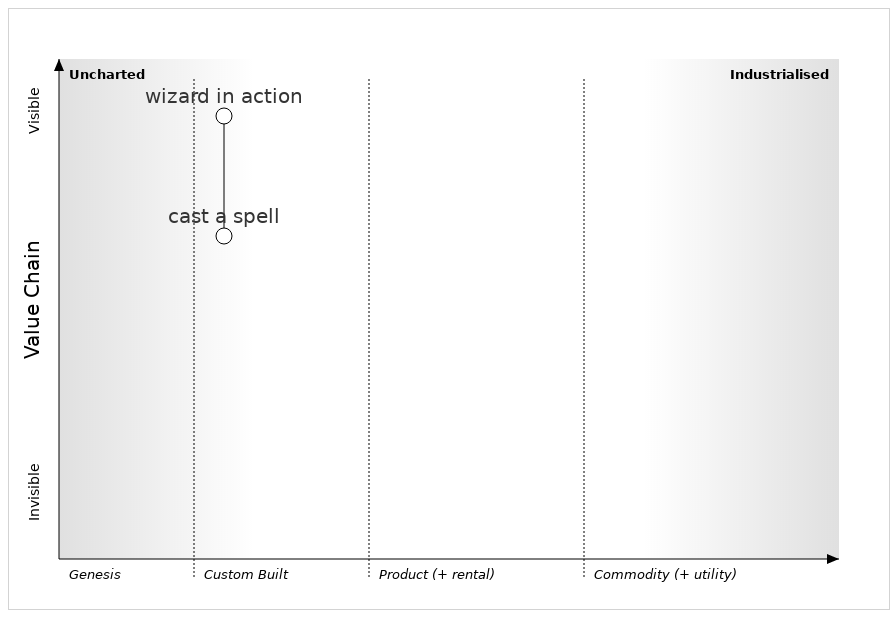

In [35]:
map_code = """
add("wizard in action", 1, 1)

add("cast a spell", 1, 3.1) 

link("wizard in action", "cast a spell")
"""
maps_create(map_code)


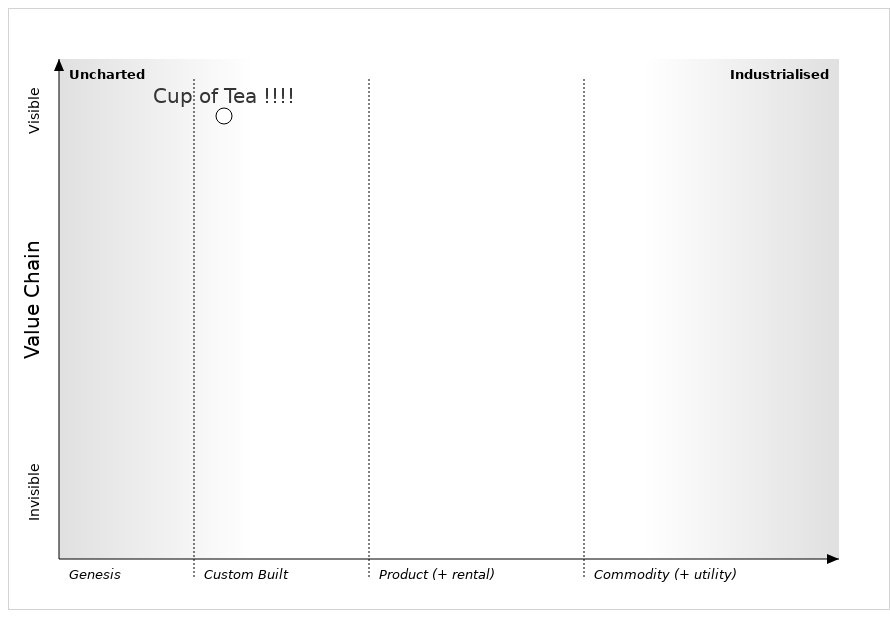

In [13]:
from IPython.display        import display_html, HTML, Javascript,display
from osbot_aws.apis.Lambda import Lambda
from jira import JIRA
from osbot_jira.api.jira_server.API_Jira import API_Jira


class Wardley_Map:
    def __init__(self):
        self.depth    = 1
        self.map_code = ""
        
    def maps_create(self, code, height= 300):
        aws_lambda = Lambda('osbot_browser.lambdas.lambda_browser')
        params = ["maps", "exec_js"]
        params.extend(code.split(' '))

        payload = {"params": params,
                   'data': {}}
        png_data = aws_lambda.invoke(payload)
        self.show_png(png_data, height)
    #    return png_data

    def show_png(self, png_data,height=200):
        html = '<img style="_width:100%;height:{0}px;border:1px solid black" align="left" src="data:image/png;base64,{1}"/>'.format(height,png_data)
        display_html(html, raw=True)      


    def add_node(self, summary, evolution):
        self.map_code += 'add("{0}", 1, {1})'.format(summary, evolution)

    def show_map(self):
        self.maps_create(self.map_code)


class Jira_Map        
    def __init__(self)
        self.api_jira = API_Jira()
        self.api_jira._jira = JIRA(server='https://ubuntu-policy.atlassian.net/')

    def create(issue_id):
        
    issue = api_jira.issue('Map-1')
summary = issue['Summary']        

wmap = Wardley_Map()        
wmap.add_node(summary, 1)

wmap.show_map()

